In [1]:
from keras.datasets import reuters
from keras import layers, models
import matplotlib.pyplot as plt
import keras
import numpy as np

Using TensorFlow backend.


In [2]:
# save np.load()
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [3]:
train_data[:1]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])],
      dtype=object)

In [4]:
print('train_data.shape => 訓練樣本', train_data.shape)
print('test_data.shape => 測試樣本', test_data.shape)

train_data.shape => 訓練樣本 (8982,)
test_data.shape => 測試樣本 (2246,)


In [5]:
print('train_data => 訓練樣本', len(train_data))
print('test_data => 測試樣本' , len(test_data))

train_data => 訓練樣本 8982
test_data => 測試樣本 2246


In [6]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


### 用文字解碼 新聞專欄 

In [7]:
word_index         = reuters.get_word_index()

# 取單字(鍵), 對應數字(值) 的 字典
reverse_word_index = dict([(value, key) for (value, key) in word_index.items()])

# 索引值 0, 1, 2 保留, 分別是 '填補', '開始位置', '未知'
decoded_newswire   = ''.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [8]:
train_labels[10] # => 標準答案 為第 3 類 所以顯示為 3

3

## 準備資料
###  進行 One-Hot 編碼
- setting x_train
- setting x_test

In [9]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences): # <= 進行 One-Hot 編碼
        results[i, sequences] = 1.
    return results

x_train = vectorize_sequences(train_data) # => 訓練資料集向量化
x_test  = vectorize_sequences(test_data)  # => 測試資料集向量化

### 簡易的 one-hot 編碼(分類編碼(categorical encoding))
- 每個函數中, 各個元素設為 0
- 只有 '指定的索引位置' 設為 1


In [10]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension)) # 將所有元宿設為 '0'
    for i, label in enumerate(labels):
        results[i, label] = 1. # <= 第 i 個元素設為 '1'
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels  = to_one_hot(test_labels)

### Keras 有內建可以使用此編碼方式
- from keras.utils.np_utils import to_categorical

In [11]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels  = to_categorical(test_labels)

In [12]:
one_hot_train_labels = keras.utils.np_utils.to_categorical(train_labels)
one_hot_test_labels  = keras.utils.np_utils.to_categorical(test_labels)

## Build Neural Network

- 建立模型 

In [13]:
from keras import models, layers
from keras import activations as activation
from keras import losses as loss
from keras import optimizers as optimizer
from keras import metrics

In [14]:
input_shape = (10000, )
model = models.Sequential()
model.add(layers.Dense(64, 
                       activation = activation.relu, 
                       input_shape = input_shape))

model.add(layers.Dense(64, activation = activation.relu))

model.add(layers.Dense(46, activation = activation.softmax)) # OutOut 46 units 

W1213 17:40:47.745285 19792 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1213 17:40:47.756213 19792 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1213 17:40:47.759206 19792 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer = 'rmsprop', 
              loss = loss.binary_crossentropy, 
              metrics = ['accuracy'])

W1213 17:40:47.796970 19792 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1213 17:40:47.811094 19792 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1213 17:40:47.815078 19792 deprecation.py:323] From c:\python36\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 切片驗證資料集

- 進行驗證 
- 在 training_data 中切出 '1000' 個樣本當作 test_data

In [17]:
# 取 input data '前10,000筆 ' 做為 'testing data'
x_val = x_train[:1000]

# input data 的 第 ' 10,000筆 '後, 才為 'training data'
partial_x_train = x_train[1000:]

# 取 input labels '前10,000筆 ' 做為 'testing labels'
y_val = one_hot_train_labels[:1000]

# input data 的 第 ' 10,000筆 '後, 才為 'training labels'
partial_y_train = one_hot_train_labels[1000:]

### Traing Model (20 epochs): 

In [18]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data = (x_val, y_val))

W1213 17:40:48.033873 19792 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 293us/step - loss: 0.0732 - acc: 0.9808 - val_loss: 0.0514 - val_acc: 0.9856
Epoch 2/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.0440 - acc: 0.9883 - val_loss: 0.0411 - val_acc: 0.9892
Epoch 3/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.0344 - acc: 0.9908 - val_loss: 0.0366 - val_acc: 0.9904
Epoch 4/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.0283 - acc: 0.9922 - val_loss: 0.0347 - val_acc: 0.9908
Epoch 5/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.0236 - acc: 0.9933 - val_loss: 0.0321 - val_acc: 0.9910
Epoch 6/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.0198 - acc: 0.9943 - val_loss: 0.0311 - val_acc: 0.9917
Epoch 7/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.0167 - acc: 0.9951 - val_loss: 0.0307 - val_acc: 0.9917
Epoch 

### Training & Validation Loss Score Figure

In [19]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

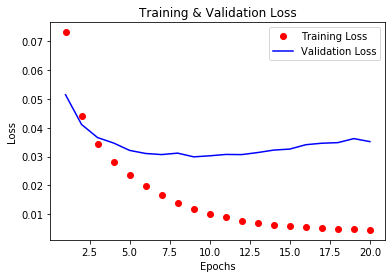

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1, len(loss) + 1)

plt.title('Training & Validation Loss')
plt.plot(epochs, loss    , 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b' , label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Figure Accuracy
- Clear Figure
- plt.clf()

In [21]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


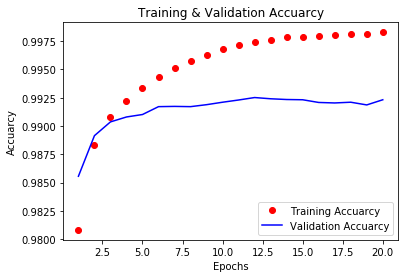

In [22]:
plt.clf()
acc     = history.history['acc']
val_acc = history.history['val_acc']
# epochs   = range(1, len(loss) + 1)

plt.title('Training & Validation Accuarcy')
plt.plot(epochs, acc    , 'ro', label = 'Training Accuarcy')
plt.plot(epochs, val_acc, 'b' , label = 'Validation Accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

# 確認訓練結果, 重新訓練模型

In [23]:
from keras import losses as loss

In [24]:

model = models.Sequential()
model.add(layers.Dense(64, 
                       activation = 'relu', 
                       input_shape = (10000, )))
model.add(layers.Dense(64, 
                       activation = 'relu'))
model.add(layers.Dense(46, 
                       activation = 'softmax'))

model.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

model.fit(partial_x_train, 
          partial_y_train, 
          epochs = 9, 
          batch_size = 512, 
          validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 107us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 83us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 84us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 83us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 83us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 82us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 83us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8/9
798

In [25]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 119us/step


In [26]:
results

[1.0224982515999173, 0.7756010686194165]

# 隨機亂數猜測 準確誤差大約多少?


In [27]:
import copy
test_lablels_copy = copy.copy(test_labels)
np.random.shuffle(test_lablels_copy)
hits_arrary = np.array(test_labels) == np.array(test_lablels_copy)
float(np.sum(hits_arrary)) / len(test_labels)

0.182546749777382

## 對新資料進行預測

In [28]:
predictions = model.predict(x_test)

In [29]:
predictions.shape

(2246, 46)

### 長度多少向量 

In [30]:
predictions[0].shape

(46,)

### 係數總和為1(註:機率總合為 1.0)

In [31]:
np.sum(predictions[0])

0.99999994

### 項目中所得到的最大數值, 亦是預測的類別, 亦也是最高機率的類別.

In [32]:
np.argmax(predictions[0])

3

# 另一種處理 Labels & Loss 的方式 
- 另一種編碼方式 => 轉為整數 Tensor

In [33]:
y_train = np.array(train_labels)
y_test  = np.array(test_labels)

# 承先前程式碼所使用之Loss Function 差異 

In [34]:
model.compile(optimizer='rmsprop', 
              loss = 'sparse_categorical_crossentropy', 
              metrics= ['acc'])

## Testing Example 

In [35]:

model = models.Sequential()
model.add(layers.Dense(64, 
                       activation = 'relu', 
                       input_shape = (10000, )))
model.add(layers.Dense(32, 
                       activation = 'relu'))
model.add(layers.Dense(46, 
                       activation = 'softmax'))

model.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

model.fit(partial_x_train, 
          partial_y_train, 
          epochs = 9, 
          batch_size = 512, 
          validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 133us/step - loss: 2.8387 - acc: 0.5140 - val_loss: 1.9981 - val_acc: 0.6220
Epoch 2/9
7982/7982 [==============================] - 1s 85us/step - loss: 1.5804 - acc: 0.6857 - val_loss: 1.3912 - val_acc: 0.7030
Epoch 3/9
7982/7982 [==============================] - 1s 86us/step - loss: 1.1235 - acc: 0.7653 - val_loss: 1.1873 - val_acc: 0.7440
Epoch 4/9
7982/7982 [==============================] - 1s 90us/step - loss: 0.8928 - acc: 0.8140 - val_loss: 1.0574 - val_acc: 0.7760
Epoch 5/9
7982/7982 [==============================] - 1s 85us/step - loss: 0.7217 - acc: 0.8475 - val_loss: 0.9864 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 85us/step - loss: 0.5887 - acc: 0.8745 - val_loss: 0.9611 - val_acc: 0.7940
Epoch 7/9
7982/7982 [==============================] - 1s 87us/step - loss: 0.4868 - acc: 0.8970 - val_loss: 0.8981 - val_acc: 0.8130
Epoch 8/9
798

#### input x_test,  one_hot_test_labels(x_labels) 評估模型model.evaluate()

In [37]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

2246/2246 [==============================] - 0s 112us/step
[0.9616852292819206, 0.7840605521456854]


### 隨機產生 驗證誤差值

In [38]:
import copy
test_lablels_copy = copy.copy(test_labels)
np.random.shuffle(test_lablels_copy)
hits_arrary = np.array(test_labels) == np.array(test_lablels_copy)
float(np.sum(hits_arrary)) / len(test_labels)

0.18833481745325023